In [4]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

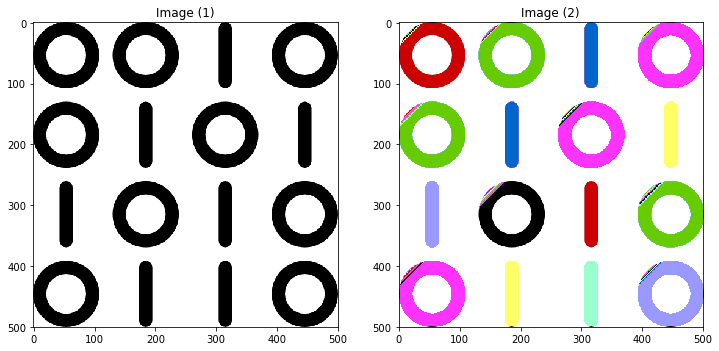

In [11]:
import numpy as np
from PIL import Image
import cv2

def findMin(x):
    tmp = 1000000
    for i in x:
        if (i < tmp):
            tmp = i
    return tmp

def checkBackGround(x):
    if (x[0] >= 250): return True
    return False
    
def ConnectedComponentLabelling(img) :
    img_arr = np.array(img)
#     print(img_arr)
    width = int(len(img_arr[0]))
    height = int(len(img_arr))

    status = np.zeros([height,width])
    arr = np.empty([height,width],dtype=int)

    link = dict()

    nextLabel = 1

    for y in range(1,height-1):
        for x in range(1,width-1):            
            #print(img_arr[y][x])
            if(checkBackGround(img_arr[y][x])):
                arr[y][x] = 0
                status[y][x] = 0
            else:
                arr[y][x] = 1
                status[y][x] = 1

    #print((arr[3][3]).getRank())
    '''for y in range(1,height-1):
        for x in range(1,width-1):
             print((arr[y][x]), end=" ")
        print()
        
    print()
    print()'''
    #first pass
    for y in range(1,height-1):
        for x in range(1, width-1):
            if (status[y][x] == 1):
                neighbors = set([])
                if status[y-1][x-1] == 2: 
                    #print("to add:",arr[y-1][x-1])
                    neighbors.add(arr[y-1][x-1])
                if status[y-1][x] == 2: 
                    #print("to add:",arr[y-1][x])                    
                    neighbors.add(arr[y-1][x])
                if status[y-1][x+1] == 2: 
                    #print("to add:",arr[y-1][x+1])
                    neighbors.add(arr[y-1][x+1])
                if status[y][x-1] == 2: 
                    #print("to add:",arr[y][x-1])
                    neighbors.add(arr[y][x-1])
                if status[y][x+1] == 2: 
                    #print("to add:",arr[y][x+1])
                    neighbors.add(arr[y][x+1])
                if status[y+1][x-1] == 2: 
                    #print("to add:",arr[y+1][x-1])
                    neighbors.add(arr[y+1][x-1])
                if status[y+1][x] == 2: 
                    #print("to add:",arr[y+1][x])
                    neighbors.add(arr[y+1][x])
                if status[y+1][x+1] == 2: 
                    #print("to add:",arr[y+1][x+1])
                    neighbors.add(arr[y+1][x+1])
                #print(y,x,":",neighbors)  
               
                if(len(neighbors) == 0):
                    link[nextLabel]  = set([nextLabel])
                    arr[y][x] = nextLabel
                    nextLabel += 1
                else:
                    min = findMin(neighbors)
                    arr[y][x] = min
                    for i in neighbors:
                        link[i] = (link[i]).union(neighbors)
                status[y][x] = 2

    '''for y in range(1,height-1):
        for x in range(1,width-1):
             print((arr[y][x]), end=" ")
        print()    
    print()
    print()

    print(link)'''
    #second pass
    '''for y in range(1,height - 1):
        for x in range(1,width - 1):
            for key in link:
                if arr[y][x] in link[key]:
                    print(i,end = " ")
                    break
        print()
    print()'''

    for y in range(height):
        for x in range(width):
            if(status[y][x] != 0):
                arr[y][x] = findMin(link[(arr[y][x])])
    
    #create new picture with colors
    #arr_out = np.zeros([width,height,3],dtype=int)
    arr_out = img_arr
    for y in range(1, height - 1):
        for x  in range(1,width - 1):
            if (status[y][x] != 0):
                if(arr[y][x]%8 == 1):
                    arr_out[y][x][0] = 204
                if(arr[y][x]%8 == 2):
                    arr_out[y][x][0] = 102
                    arr_out[y][x][1] = 204
                if(arr[y][x]%8 == 3):
                    arr_out[y][x][1] = 102
                    arr_out[y][x][2] = 204
                if(arr[y][x]%8 == 4):
                    arr_out[y][x][0] = 255
                    arr_out[y][x][1] = 51
                    arr_out[y][x][2] = 255
                if(arr[y][x]%8 == 5):
                    arr_out[y][x][0] = 255
                    arr_out[y][x][1] = 255
                    arr_out[y][x][2] = 102
                if(arr[y][x]%8 == 6):
                    arr_out[y][x][0] = 153
                    arr_out[y][x][1] = 255
                    arr_out[y][x][2] = 204
                if(arr[y][x]%8 == 7):
                    arr_out[y][x][0] = 153
                    arr_out[y][x][1] = 153
                    arr_out[y][x][2] = 255
            else:
                for i in range(3):
                    arr_out[y][x][i] = 255
    return (arr_out)
#     print(arr_out)
#     new_img = Image.fromarray(arr_out)
#     new_img.save("output.png")
#     new_img.show()
image = cv2.bitwise_not(cv2.imread("C:\\Users\\Bone\\Desktop\\sample.png"))
output = ConnectedComponentLabelling(image)
images = (image,output)
show_images(images)
